In [19]:
import time
from copy import deepcopy

import IPython.display as IPd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

import stg_energy.tweet.viz as viz
from pyloric import simulate, summary_stats
from stg_energy.common import col, svg
import pandas as pd

# Figure 2

In [20]:
pd.options.display.max_columns=999

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
PANEL_A = "../svg/panel_a.svg"
PANEL_B = "../svg/panel_b.svg"
PANEL_C1 = "../svg/panel_c1.svg"
PANEL_C2 = "../svg/panel_c2.svg"
PANEL_D1 = "../svg/panel_d1.svg"
PANEL_D2 = "../svg/panel_d2.svg"

PANEL_C1_supp = "../svg/panel_c1_supp.svg"
PANEL_C2_supp = "../svg/panel_c2_supp.svg"
PANEL_D1_supp = "../svg/panel_d1_supp.svg"
PANEL_D2_supp = "../svg/panel_d2_supp.svg"

In [23]:
theta = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_circuit_parameters.pkl")
x = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_simulation_outputs.pkl")
seeds = np.load("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_seeds.npy")

theta_np = theta.to_numpy()
x_np = x.to_numpy()

In [24]:
all_energies_per_spike = x["energies_per_spike"].to_numpy()
all_total_energies = x["energies"].to_numpy()

In [25]:
summed_energies_per_spike = np.sum(np.asarray(all_energies_per_spike), axis=1)
summed_energies_total = np.sum(np.asarray(all_total_energies), axis=1)

In [26]:
inds = np.argsort(summed_energies_total)
sorted_params = theta_np[inds]
sorted_seeds = seeds[inds]
sorted_params_pd = pd.DataFrame(sorted_params, columns=theta.columns)

In [27]:
all_out_targets = []
summstats = []
for counter in [1500, len(sorted_params) - 500]:
    out_target = simulate(
        sorted_params_pd.loc[counter], seed=int(sorted_seeds[counter]), track_currents=True, track_energy=True
    )
    summstats.append(summary_stats(out_target, stats_customization={'energies': True}))
    all_out_targets.append(out_target)

In [28]:
time_vec = np.arange(0, 11000, 0.025)

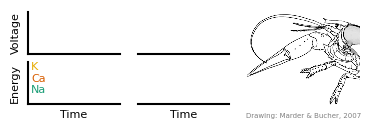

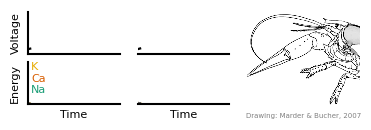

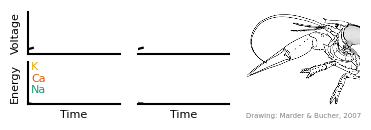

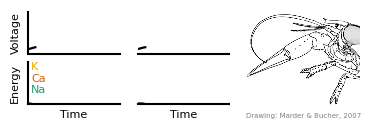

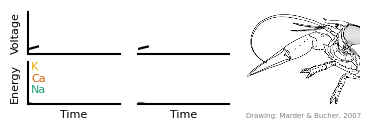

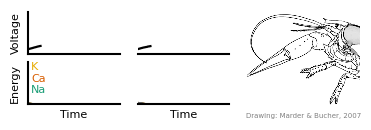

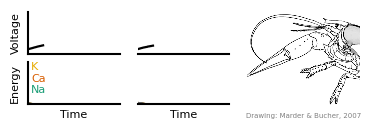

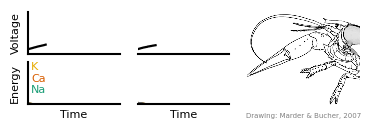

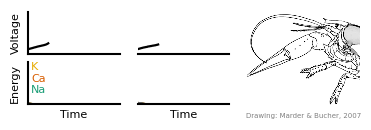

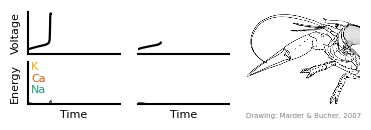

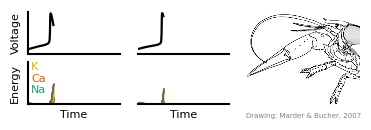

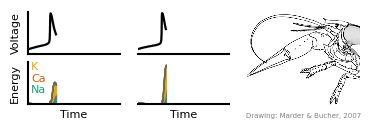

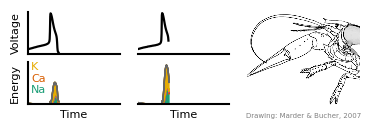

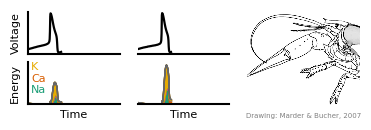

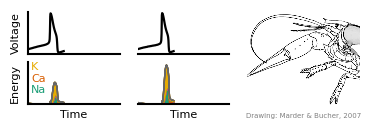

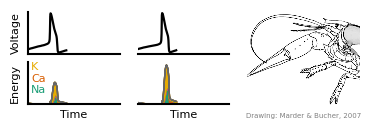

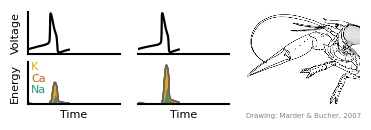

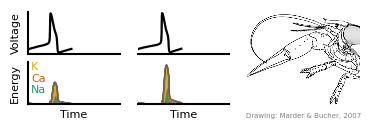

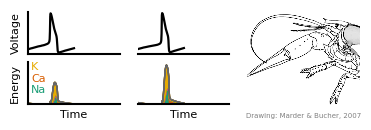

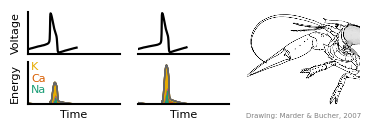

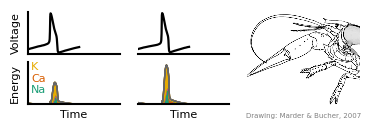

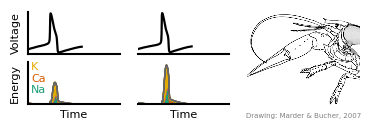

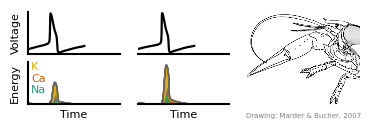

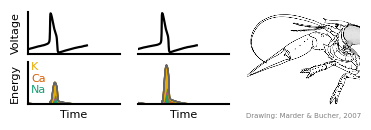

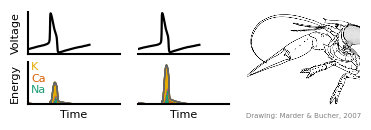

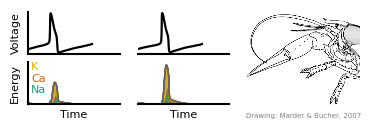

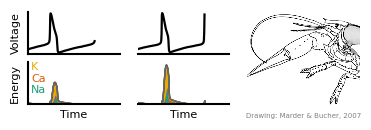

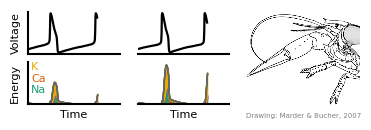

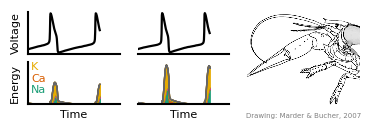

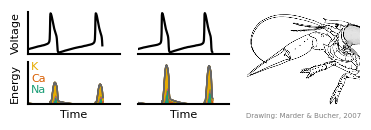

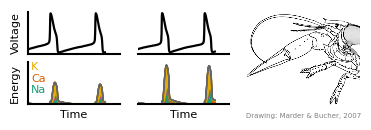

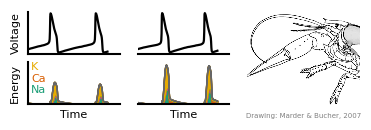

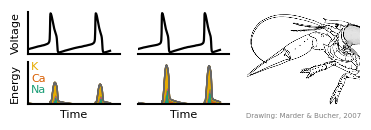

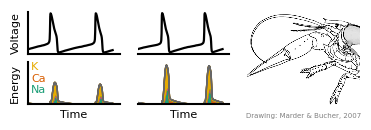

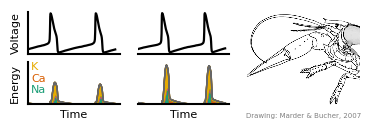

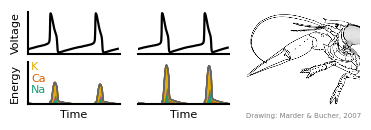

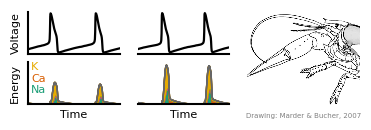

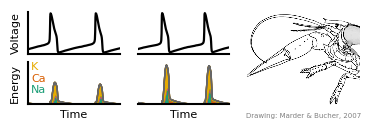

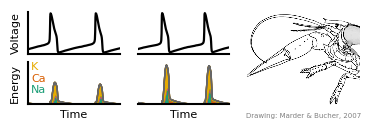

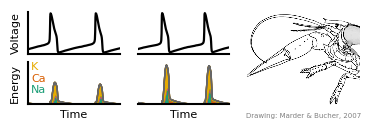

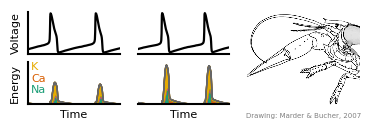

In [39]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    for i in range(0, 41, 1):
        viz.energy_scape_both(
            all_out_targets,
            time_vec,
            figsize=(2.6, 1.2),
            cols=['k', 'k', 'k'],
            max_dur = i,
        )
        plt.savefig(f"../fig/tweet_{i}.png", dpi=200, bbox_inches="tight")
        plt.show()